# <center>Truncamiento<center>

Este notebook proporciona una explicación detallada sobre el truncamiento en modelos y simulación empresarial,
incluyendo su teoría, ejemplos prácticos en Python y la formulación matemática que lo respalda.

### Importación de Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

# Capítulo 1: Introducción al Truncamiento

### ¿Qué es el truncamiento?

El truncamiento en Modelos y Simulación Empresarial se refiere a la **eliminación o limitación** de ciertos valores de una distribución aleatoria, esto con el sentido de eliminar valores que no tengan sentido con el enfoque del problema o si se quiere evaluar un conjunto de datos especifico


Por ejemplo, en un modelo de simulación de demanda de productos, una distribución normal sin restricciones puede generar valores negativos, lo cual no es posible en la realidad. Aplicando truncamiento, aseguramos que los valores generados sean coherentes con el contexto empresarial.

El truncamiento se utiliza en diversas aplicaciones como:
- Modelado de demanda de productos
- Predicción de tiempos de entrega
- Simulación de costos y presupuestos
- Control de inventarios y pronósticos de ventas


---------------------

# Capítulo 2: Formulación Matemática del Truncamiento

### Definición Matemática

Si una variable aleatoria continua $X$ sigue una distribución normal con media $μ$ y desviación estándar $σ$, se expresa como:

$X$ ~ $N(μ, σ^2)$

Donde:

* $X$ es la variable aleatoria continua
* $μ$ es la media de la distribución normal
* $σ$ es la desviación estándar de la distribución normal
* $N$ es la distribución normal

Si queremos truncar la variable en un intervalo \[$a, b$], la distribución truncada se define como:

$X$<sub>t</sub> ~ $N$<sub>\[a, b]</sub>$(μ, σ^2)$

Donde:

* $X$<sub>t</sub> es la variable aleatoria truncada.
* \[$a, b$] es el intervalo de truncamiento.
* $N$<sub>\[$a, b$]</sub> denota la distribución normal truncada en el intervalo \[$a, b$].

La función de densidad de probabilidad (PDF) de la distribución truncada está dada por:

$f$<sub>t</sub>$(x) = f(x) / (F(b) - F(a)),  a ≤ x ≤ b$

Donde:

* $f$<sub>t</sub>(x) es la PDF de la distribución normal truncada.
* $f(x)$ es la PDF de la distribución normal original.
* $F(x)$ es la función de distribución acumulada (CDF) de la distribución normal original.
* $a$ es el límite inferior del intervalo de truncamiento.
* $b$ es el límite superior del intervalo de truncamiento.

Esto garantiza que los valores de la variable aleatoria se encuentren dentro del rango especificado \[$a, b$].

### Determinación de los limites a partir de $k$

En muchos casos, los límites de truncamiento se definen en función de la desviación estánda $σ$ y un parámetro $k$, que representa cuántas desviaciones estándar se alejan los límites respecto a la media $μ$. Así, los límites se pueden definir como:

- $a=μ−kσ$

- $b=μ+kσ$

Donde:

k es un factor que determina qué porcentaje de la distribución se mantiene dentro del intervalo. Algunos valores comunes de k en distribuciones normales son:

- $k=1$  Aproximadamente el 68% de los valores quedan dentro de $[a,b]$

- $k=2$  Aproximadamente el 95% de los valores quedan dentro de $[a,b]$

- $k=3$  Aproximadamente el 99.7% de los valores quedan dentro de $[a,b]$

Dependiendo de la distribución aplicada, k debe ajustarse según el contexto. A veces de debe aplicar percentiles en lugar de buscar simetría con respecto a $μ$

---------------------

# Capítulo 3: Análisis Descriptivo y Comparaciones

### Ejemplo 1 (Truncamiento de una Distribución Normal)

Un equipo de preparadores físicos está analizando los tiempos de recuperación de los atletas después de una maratón. Se sabe que el tiempo promedio de recuperación completa es de **48 horas**, con una **desviación estándar de 12 horas**.

Sin embargo, los médicos han determinado que el tiempo mínimo de recuperación antes de volver a entrenar es de **24 horas**, y que ningún atleta tarda más de **96 horas** en recuperarse completamente

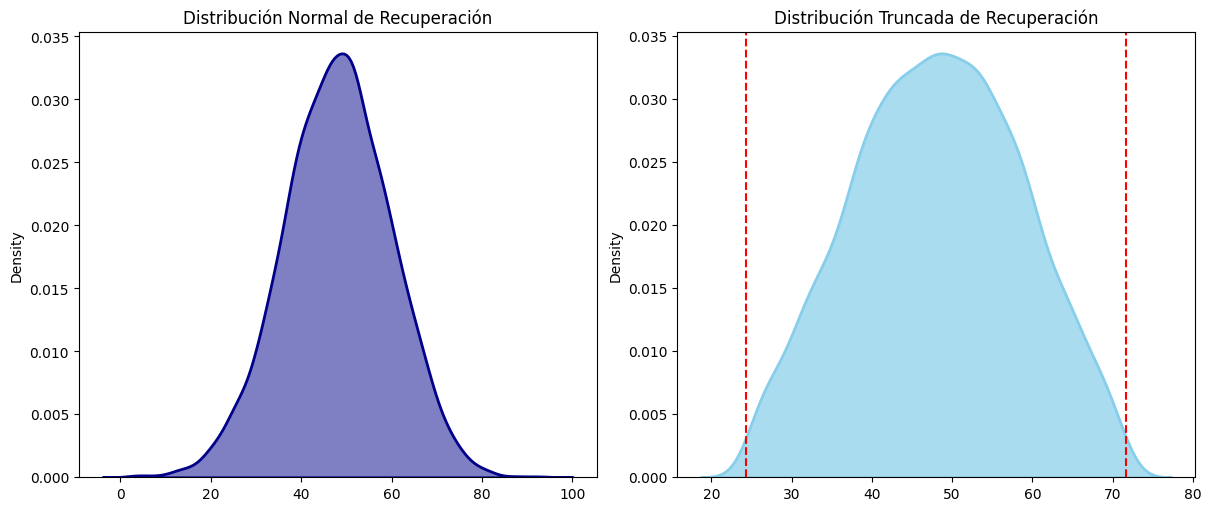

Métrica Distribución Normal Distribución Truncada
  Media               47.96                 48.18
    Std               11.83                 10.49
    Min                2.46                 24.42
    Max               93.69                 71.61
    25%               40.00                 40.51
    50%               48.10                 48.25
    75%               55.99                 55.95


In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), layout='constrained')

mean_a = 48  # Media en horas
std_a = 12   # Desviación estándar en horas

# Distribución Normal
norm_a = np.random.normal(loc=mean_a, scale=std_a, size=5000)
sns.kdeplot(norm_a, fill=True, color='darkblue', alpha=0.5, ax=ax[0], linewidth=2)
ax[0].set_title('Distribución Normal de Recuperación')

# Límites de truncamiento con desviaciones estándar
k = 2
norm_lower = np.mean(norm_a) - (k * np.std(norm_a))
norm_upper = np.mean(norm_a) + (k * np.std(norm_a))

# Distribución Truncada
truncated_norm_a = stats.truncnorm((norm_lower - mean_a) / std_a, (norm_upper - mean_a) / std_a, loc=mean_a, scale=std_a).rvs(5000) 
sns.kdeplot(truncated_norm_a, fill=True, color='skyblue', alpha=0.7, ax=ax[1], linewidth=2)
ax[1].set_title('Distribución Truncada de Recuperación')
ax[1].axvline(norm_lower, color='red', linestyle='dashed')
ax[1].axvline(norm_upper, color='red', linestyle='dashed')

plt.show()

# Estadísticas descriptivas
stats_dict_norm = {
    "Métrica": ["Media", "Std", "Min", "Max", "25%", "50%", "75%"],
    "Distribución Normal": [np.mean(norm_a), np.std(norm_a), np.min(norm_a), np.max(norm_a), np.percentile(norm_a, 25), np.percentile(norm_a, 50), 
                            np.percentile(norm_a, 75)],
    "Distribución Truncada": [np.mean(truncated_norm_a), np.std(truncated_norm_a), np.min(truncated_norm_a), np.max(truncated_norm_a), 
                              np.percentile(truncated_norm_a, 25), np.percentile(truncated_norm_a, 50), np.percentile(truncated_norm_a, 75)]
}
df_stats_norm = pd.DataFrame(stats_dict_norm)

print(df_stats_norm.to_string(index=False, formatters={"Distribución Normal": "{:.2f}".format, "Distribución Truncada": "{:.2f}".format}))


### Ejemplo 2 (Truncamiento de una Distribución Exponencial)

Un hospital está analizando los tiempos de espera en urgencias antes de que un paciente sea atendido por un médico. Se ha observado que estos tiempos siguen una **distribución exponencial**, con un tiempo medio de espera de **5 minutos**(lo que implica un parámetro $𝜆 = 1/5$)

Sin embargo, debido a regulaciones del hospital, **ningún paciente debe esperar más de 10 minutos** antes de ser atendido. Por lo tanto, queremos modelar la distribución truncada para evaluar cómo afecta esta restricción a los tiempos de espera.

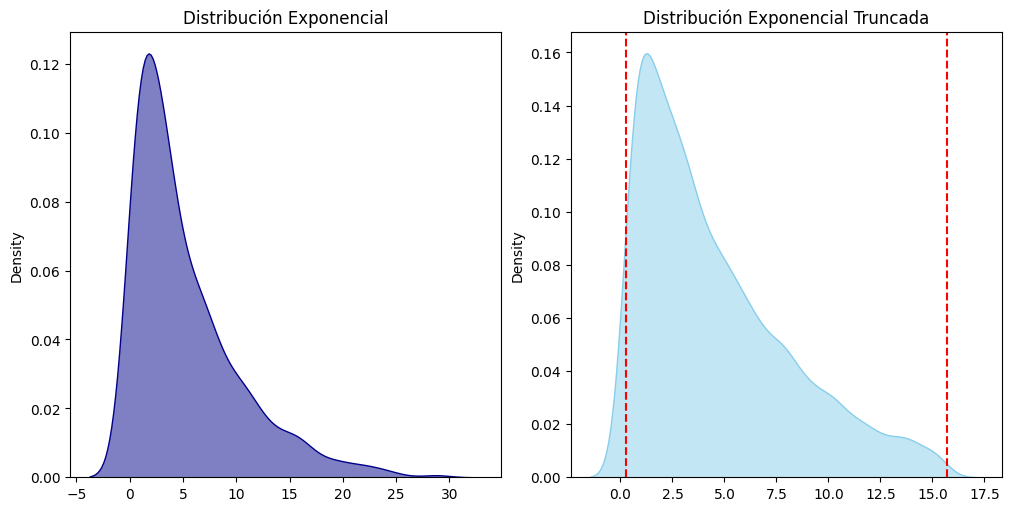

Métrica Distribución Exponencial Distribución Truncada
  Media                     5.24                  4.56
    Std                     5.01                  3.60
    Min                     0.01                  0.27
    Max                    29.21                 15.68
    25%                     1.50                  1.66
    50%                     3.57                  3.53
    75%                     7.41                  6.62


In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

lambda_a = 1/5  # Media de 5 minutos

# Distribución Exponencial
exp_a = np.random.exponential(scale=1/lambda_a, size=1000)
sns.kdeplot(exp_a, color='darkblue', fill=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución Exponencial')

# Limites de truncamiento con percentiles
exp_lower = np.percentile(exp_a, 5)
exp_upper = np.percentile(exp_a, 95)

# Distribución Truncada
truncated_exp_a = stats.truncexpon(b=(exp_upper-exp_lower)/(1/lambda_a), loc=exp_lower, scale=1/lambda_a).rvs(10000)
sns.kdeplot(truncated_exp_a, color='skyblue', fill=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución Exponencial Truncada')
ax[1].axvline(exp_lower, color='red', linestyle='dashed')
ax[1].axvline(exp_upper, color='red', linestyle='dashed')

plt.show()

# Estadísticas descriptivas
stats_dict_exp = {
    "Métrica": ["Media", "Std", "Min", "Max", "25%", "50%", "75%"],
    "Distribución Exponencial": [np.mean(exp_a), np.std(exp_a), np.min(exp_a), np.max(exp_a),np.percentile(exp_a, 25), np.percentile(exp_a, 50), np.percentile(exp_a, 75)],
    "Distribución Truncada": [np.mean(truncated_exp_a), np.std(truncated_exp_a), np.min(truncated_exp_a), np.max(truncated_exp_a),np.percentile(truncated_exp_a, 25), np.percentile(truncated_exp_a, 50), np.percentile(truncated_exp_a, 75)]
}
df_stats_exp = pd.DataFrame(stats_dict_exp)
print(df_stats_exp.to_string(index=False, formatters={"Distribución Exponencial": "{:.2f}".format, "Distribución Truncada": "{:.2f}".format}))

---------------------

# Capítulo 4: Aplicaciones Empresariales

El truncamiento es una técnica esencial en la simulación empresarial, ya que permite modelar mejor las realidades del negocio. 
A continuación, se presentan algunos casos de uso:

### 1. **Simulación de Inventarios**
   - Un almacén tiene un espacio limitado para almacenar productos.
   - No se pueden tener existencias negativas ni superar la capacidad máxima.
   - Se usa truncamiento para modelar la distribución de existencias diarias.

**Ejemplo**: Una empresa de logística gestiona un almacén con capacidad limitada para el almacenamiento de productos. Cada día, la cantidad de unidades recibidas sigue una distribución de Poisson con una media de 15 productos diarios.

Sin embargo, el inventario debe mantenerse dentro de ciertos límites:
- No puede haber menos de 5 productos, ya que es el stock mínimo de seguridad.
- No puede superar los 30 productos, porque el espacio del almacén es restringido.

Para reflejar estas restricciones, se aplica truncamiento a la distribución de Poisson. Esto permite simular un inventario más realista sin valores fuera del rango permitido.

**Nota**: Para la gráfica se utiliza $histplot$ debido a que es una distribución discreta y si se implementara $kdeplot$ arrojaría un error

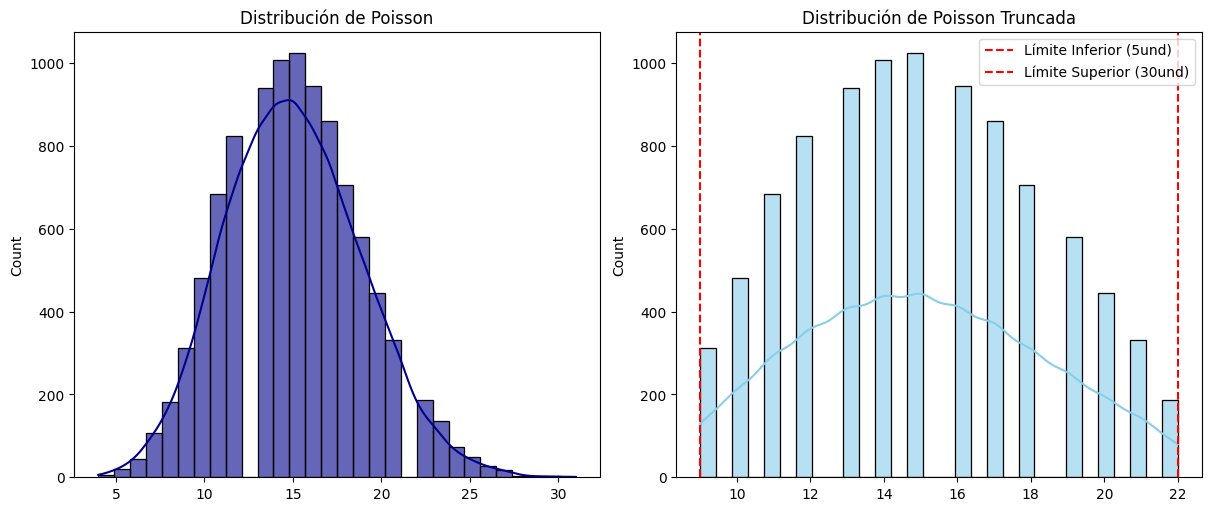

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), layout='constrained')

lambda_pos = 15   # Tasa media de productos recibidos en el almacén


# Distribución de Poisson
poisson_inv = np.random.poisson(lam=lambda_pos, size=10000)
sns.histplot(poisson_inv, color='darkblue', alpha=0.6, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Poisson')

pos_lower = np.percentile(poisson_inv, 5 ) # Nivel mínimo de inventario permitido
pos_upper = np.percentile(poisson_inv, 95)  # Nivel máximo de inventario permitido

# Distribución Truncada
truncated_poisson_inv = poisson_inv[(poisson_inv >= pos_lower) & (poisson_inv <= pos_upper)]
sns.histplot(truncated_poisson_inv, color='skyblue', alpha=0.6, bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribución de Poisson Truncada')
ax[1].axvline(pos_lower, color='red', linestyle='dashed', label='Límite Inferior (5und)')
ax[1].axvline(pos_upper, color='red', linestyle='dashed', label='Límite Superior (30und)')
ax[1].legend()

plt.show()


### 2. **Estimación de Costos y Presupuestos:**
   - Si un proyecto tiene costos que siguen una distribución normal.
   - Los costos no pueden ser negativos ni superar un presupuesto máximo.
   - Se usa truncamiento para mantener los valores dentro del rango permitido.

**Ejemplo**: Una empresa de construcción está planificando el presupuesto para un nuevo proyecto. Basado en experiencias previas, se estima que los costos siguen una distribución normal, donde:

- La media es de 30.000
- Se tiene una deviacion estandard de 2.500

En las distribuciones triangulares ya se tiene un limite superior e 

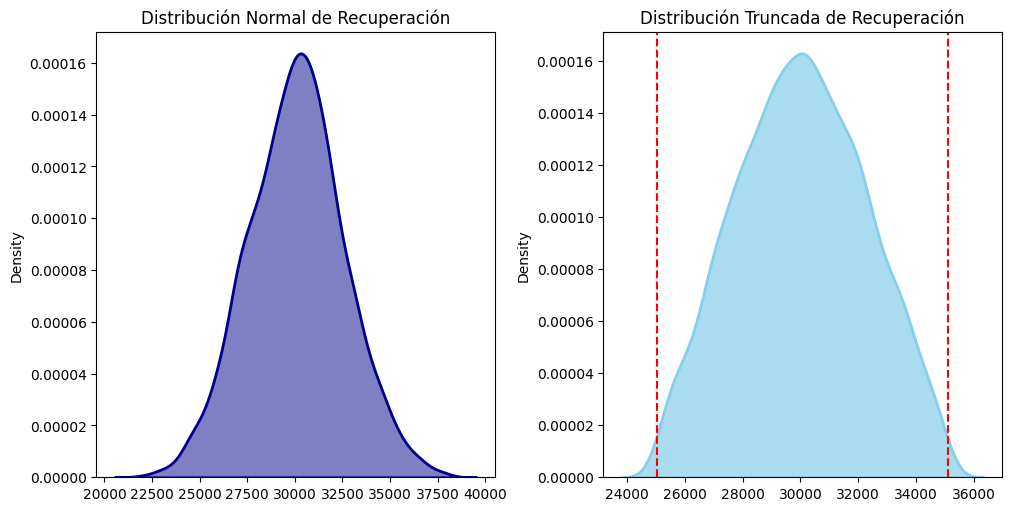

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')


mean_a = 30000
std_a = 2500

# Distribución Normal
norm_a = np.random.normal(loc=mean_a, scale=std_a, size=5000)
sns.kdeplot(norm_a, fill=True, color='darkblue', alpha=0.5, ax=ax[0], linewidth=2)
ax[0].set_title('Distribución Normal de Recuperación')

# Límites de truncamiento con desviaciones estándar (k=2 los límites de truncamiento incluyen el 95% de los datos)
k = 2
norm_lower = np.mean(norm_a) - (k * np.std(norm_a))
norm_upper = np.mean(norm_a) + (k * np.std(norm_a))

# Distribución Truncada
truncated_norm_a = stats.truncnorm((norm_lower - mean_a) / std_a, (norm_upper - mean_a) / std_a, loc=mean_a, scale=std_a).rvs(5000) 
sns.kdeplot(truncated_norm_a, fill=True, color='skyblue', alpha=0.7, ax=ax[1], linewidth=2)
ax[1].set_title('Distribución Truncada de Recuperación')
ax[1].axvline(norm_lower, color='red', linestyle='dashed')
ax[1].axvline(norm_upper, color='red', linestyle='dashed')

plt.show()


### 3. **Simulación de Tiempos de Entrega:**
   - No puede haber entregas negativas ni retrasos mayores a un umbral aceptable.
   - Se aplica truncamiento para obtener tiempos de entrega realistas.

**Ejemplo**: Una empresa de logística está analizando los tiempos de entrega de sus pedidos. Con base en datos históricos, se sabe que los tiempos de entrega siguen una distribución log-normal, debido a que algunos envíos pueden experimentar retrasos inesperados, pero no pueden ser negativos.

- Tiempo de entrega medio: 3.5 días
- Desviación estándar: 1.2 días

Sin embargo, no es realista considerar tiempos de entrega extremadamente altos. Por política de la empresa, se establece que ningún pedido debería tardar menos de 1 día ni más de 8 días en ser entregado.

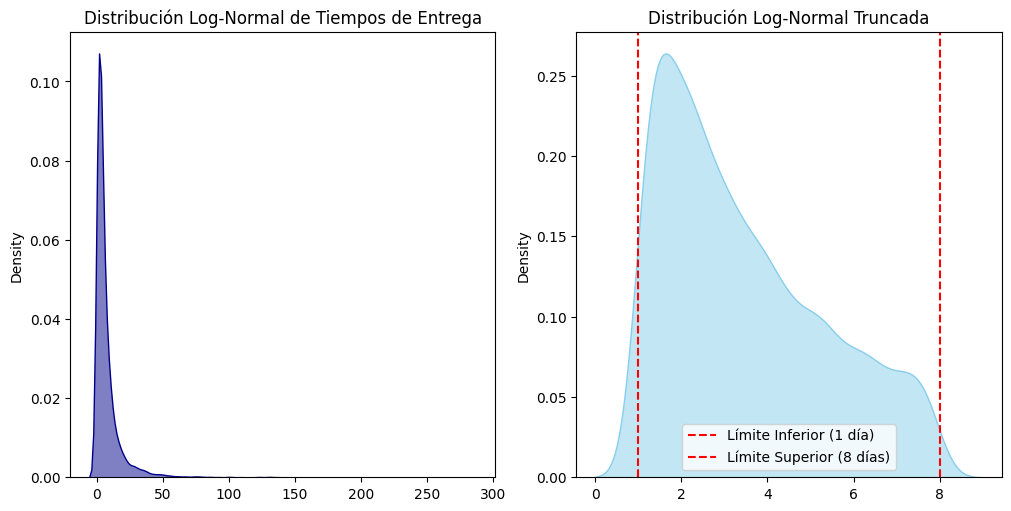

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

mu, sigma = np.log(3.5), 1.2

# Distribución Log-Normal
lognorm_dist = np.random.lognormal(mean=mu, sigma=sigma, size=10000)
sns.kdeplot(lognorm_dist, color='darkblue', fill=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución Log-Normal de Tiempos de Entrega')

delivery_min, delivery_max = 1, 8 # limite según la política de la empresa


# Distribución Truncada

truncated_lognorm_dist = lognorm_dist[(lognorm_dist >= delivery_min) & (lognorm_dist <= delivery_max)]
sns.kdeplot(truncated_lognorm_dist, color='skyblue', fill=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución Log-Normal Truncada')
ax[1].axvline(delivery_min, color='red', linestyle='dashed', label='Límite Inferior (1 día)')
ax[1].axvline(delivery_max, color='red', linestyle='dashed', label='Límite Superior (8 días)')
ax[1].legend()

plt.show()

### 4. **Pronósticos de Ventas:**
   - Se proyectan ventas futuras con una distribución estadística.
   - Se limita la cantidad de ventas dentro de valores mínimos y máximos realistas.
   - Se utiliza truncamiento para generar pronósticos más precisos.

**Ejemplo**: Una empresa de retail desea estimar la cantidad de unidades vendidas de un producto en un período determinado. A partir de datos históricos, se sabe que la demanda sigue una distribución de Poisson, ya que las ventas ocurren como eventos discretos y aleatorios a lo largo del tiempo.

- Promedio de ventas diarias: 50 unidades

Sin embargo, en la práctica:

- No se pueden vender menos de 35 unidades debido a la demanda mínima asegurada.
- No se pueden vender más de 65 unidades debido a restricciones de inventario.

**Nota**: Para la gráfica se utiliza $histplot$ debido a que es una distribución discreta y si se implementara $kdeplot$ arrojaría un error

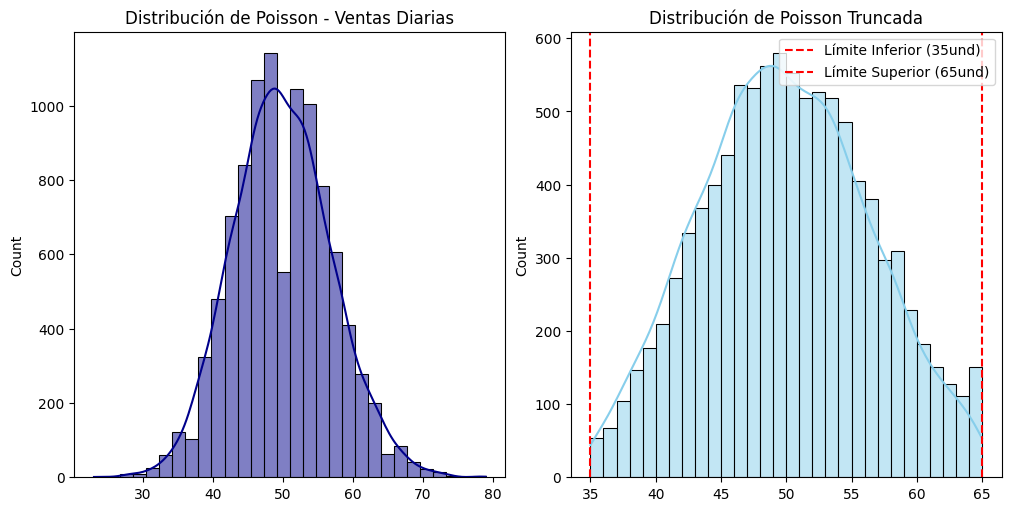

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

lambda_sales = 50

# Distribución de Poisson
poisson_sales = np.random.poisson(lam=lambda_sales, size=10000)
sns.histplot(poisson_sales, bins=30, color='darkblue', kde=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución de Poisson - Ventas Diarias')

sales_min = 35 # Límite inferior de ventas
sales_max = 65 # Límite superior de ventas 

# Distribución Truncada

truncated_poisson_sales = poisson_sales[(poisson_sales >= sales_min) & (poisson_sales <= sales_max)]
sns.histplot(truncated_poisson_sales, bins=30, color='skyblue', kde=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución de Poisson Truncada')
ax[1].axvline(sales_min, color='red', linestyle='dashed', label='Límite Inferior (35und)')
ax[1].axvline(sales_max, color='red', linestyle='dashed', label='Límite Superior (65und)')
ax[1].legend()

plt.show()

Si en este mismo ejemplo quisieramos truncar aplicando los percentiles en vez de las restricciones de inventario y de demanda minima 

Aplicaremos un truncamiento suponiendo que se venderá como minimo el 20 % de los productos y como maxímo el 80 

44.0
56.0


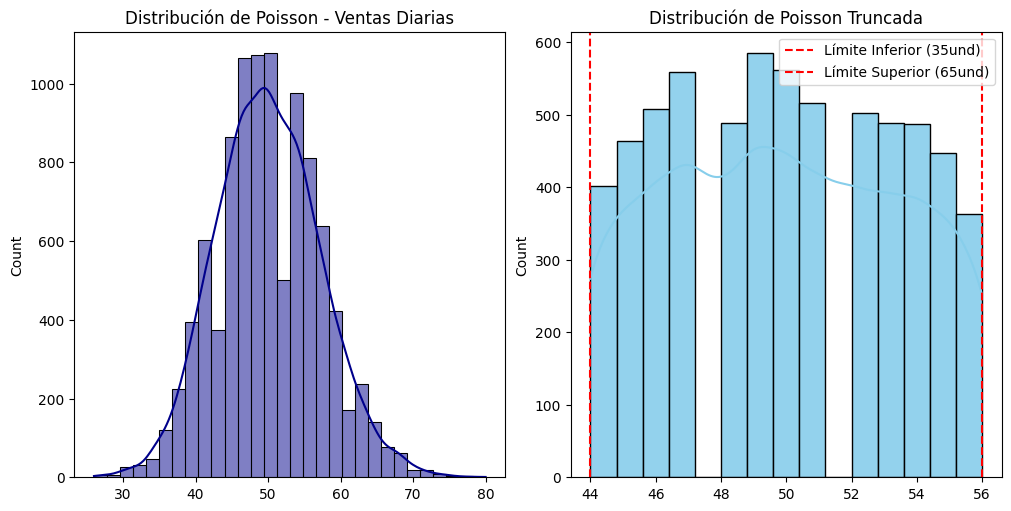

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

lambda_sales = 50

# Distribución de Poisson
poisson_sales = np.random.poisson(lam=lambda_sales, size=10000)
sns.histplot(poisson_sales, bins=30, color='darkblue', kde=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución de Poisson - Ventas Diarias')

sales_min2= np.percentile(poisson_sales, 20) # Límite inferior de ventas
sales_max2 = np.percentile(poisson_sales, 80) # Límite superior de ventas

# Distribución Truncada

truncated_poisson_sales = poisson_sales[(poisson_sales >= sales_min2) & (poisson_sales <= sales_max2)]
sns.histplot(truncated_poisson_sales, bins=15, color='skyblue', kde=True, alpha=0.9, ax=ax[1])
ax[1].set_title('Distribución de Poisson Truncada')
ax[1].axvline(sales_min2, color='red', linestyle='dashed', label='Límite Inferior (35und)')
ax[1].axvline(sales_max2, color='red', linestyle='dashed', label='Límite Superior (65und)')
ax[1].legend()
print(sales_min2)
print(sales_max2)

plt.show()

---------------------

# Capítulo 5: Ejercicios

Una póliza de seguros tiene dos clases básicas de asegurados, la clase A y la clase B; hay 38 asegurados de la clase A y 10 de la clase B.  El número de siniestros de los miembros de la clase A sigue una distribución Binomial Negativa con parámetros (5, 0,25), y el número de siniestros de los miembros de la clase B sigue una distribución geométrica con parámetro 0,25. El tamaño de una reclamación de los miembros de la clase A sigue una distribución exponencial con una media de 40.000 $, y el tamaño de la reclamación de los miembros de la clase B se distribuye con una distribución Pearson 5 con parámetros (10, 2000000). En este caso, queremos caracterizar la distribución de los siniestros totales. 

Costo Total de Siniestros (Promedio): $31,714,405.22


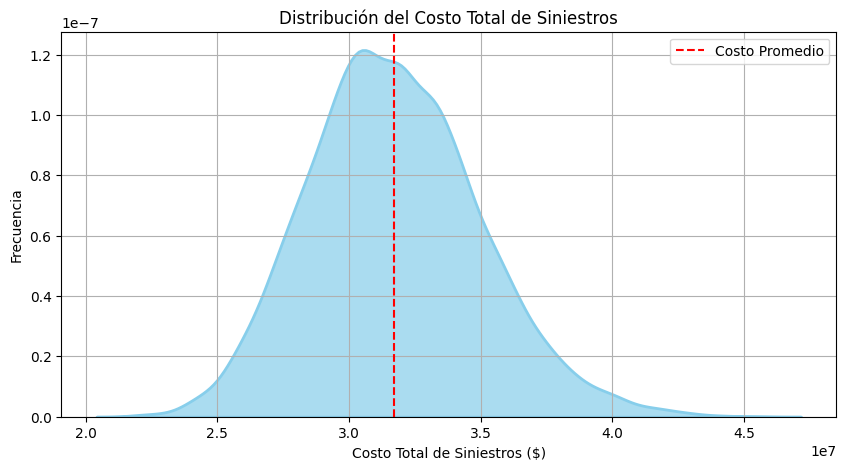

In [9]:
claseA = 38
claseB = 10 
trial = 10000

siniestros_totales = []

for _ in range(trial):
    siniestros_claseA = stats.nbinom.rvs(n=5, p=0.25, size=claseA)  
    siniestros_claseB = stats.geom.rvs(p=0.25, size=claseB)
    
    reclamaciones_A = stats.expon.rvs(scale=40000, size=np.sum(siniestros_claseA))
    reclamaciones_B = stats.invgamma.rvs(a=10, scale=2000000, size=np.sum(siniestros_claseB))
    
    total_siniestros = np.sum(reclamaciones_A) + np.sum(reclamaciones_B)
    siniestros_totales.append(total_siniestros)

print(f"Costo Total de Siniestros (Promedio): ${np.mean(siniestros_totales):,.2f}")

# Graficar la distribución del costo total de siniestros
plt.figure(figsize=(10, 5))
sns.kdeplot(siniestros_totales, fill=True, color='skyblue', alpha=0.7, linewidth=2)
plt.xlabel('Costo Total de Siniestros ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Costo Total de Siniestros')
plt.axvline(np.mean(siniestros_totales), color='red', linestyle='dashed', label='Costo Promedio')
plt.legend()
plt.grid()
plt.show()

Costo Total de Siniestros (Promedio): $31,800,387.90


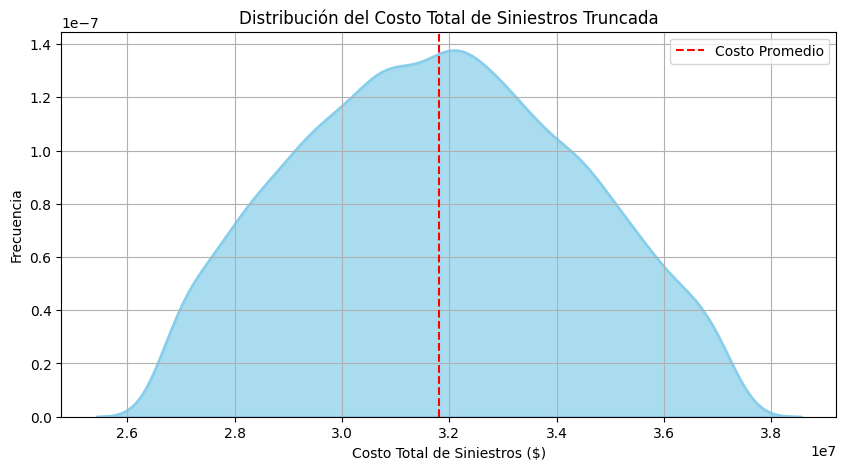

In [10]:
mean_n = np.mean(siniestros_totales)
std_n = np.std(siniestros_totales)

k = 2
norm_low = np.percentile(siniestros_totales, 5)
norm_upp = np.percentile(siniestros_totales, 95)

distribucion_truncada = stats.truncnorm((norm_low - mean_n) / std_n, (norm_upp - mean_n) / std_n, loc=mean_n, scale=std_n).rvs(10000)

print(f"Costo Total de Siniestros (Promedio): ${np.mean(distribucion_truncada):,.2f}")

# Graficar la distribución del costo total de siniestros
plt.figure(figsize=(10, 5))
sns.kdeplot(distribucion_truncada, fill=True, color='skyblue', alpha=0.7,  linewidth=2)
plt.xlabel('Costo Total de Siniestros ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Costo Total de Siniestros Truncada')
plt.axvline(np.mean(distribucion_truncada), color='red', linestyle='dashed', label='Costo Promedio')
plt.legend()
plt.grid()
plt.show()